<a href="https://colab.research.google.com/github/annettembeyu/KNN-Naive_bayes_classifier/blob/main/The_K_Nearest_Neighbours_(KNN)_IP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The K-Nearest Neighbours (KNN) Model

## 1. Defining the Question

a) Specifying the Data Analytic Question

* What sorts of people were more likely to survive?

### b) Defining the Metric for Success

The Model will have a achieved it's objective when:

* passenger who survived is accurately identified.
* determine the passengers who were most likely to survive.


### c) Understanding the context 

The K-Nearest Neighbors will be performed on the train data set as follows:


* Randomly partition each dataset into two parts i.e 80 - 20  sets, then perform K-nearest neighbor classification.
* Compute the accuracy (percentage of correct classification) and report the confusion matrix of each classifier.
Repeat the two steps above, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
* Suggest and apply at least one of the optimization techniques that you learned earlier this week.
* I will then provide further recommendations to improve both classifiers.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Importing the library packages

import os
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
train_df= pd.read_csv('train.csv')

## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
print('Train Dataset shape: {} Rows, {} Columns'.format(*train_df.shape))

Train Dataset shape: 891 Rows, 12 Columns


In [6]:
# Previewing the top of our dataset
#
display("Train Dataframe")
display(train_df.head(5))


'Train Dataframe'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Previewing the bottom of our dataset
# 
#
display("Train Dataframe")
display(train_df.tail(5))

'Train Dataframe'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Checking whether each column has an appropriate datatype
#
display("The data types of attributed for the Train Dataset are:")
display(train_df.dtypes)

'The data types of attributed for the Train Dataset are:'

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# previewing the column heads for the datasets
display("The column heads for the Train Dataset are:")
display(train_df.columns)

'The column heads for the Train Dataset are:'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 4. External Data Source Validation

Making that data matches something outside of the dataset is of utmost importannce. This ensures that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

 The following is a link to an external reliable resource so as to provide credibility to my dataset: [Link](https://www.kaggle.com/c/titanic/data?select=test.csv).

## 5. Tidying the Dataset

In [10]:
# dropping some columns
train_df= train_df.drop(['PassengerId', 'Ticket'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [12]:
# changing the datatype 
train_df.Sex=train_df.Sex.astype('category').cat.codes
train_df.Embarked = train_df.Embarked.astype('category').cat.codes

In [13]:
# checking the sum totals for the embarked column
train_df.Embarked.value_counts()

3    644
1    168
2     77
0      2
Name: Embarked, dtype: int64

In [14]:
# dropping the -1 in embarked which was not initially in the dataframe
train_df.drop(train_df[train_df['Embarked'] == -1].index, inplace = True)

In [ ]:
train_df.Embarked.value_counts()

2    644
0    168
1     77
Name: Embarked, dtype: int64

In [15]:
data = [train_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)


In [16]:
# looking at the new column formed (the title  column)
train_df.Title.value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

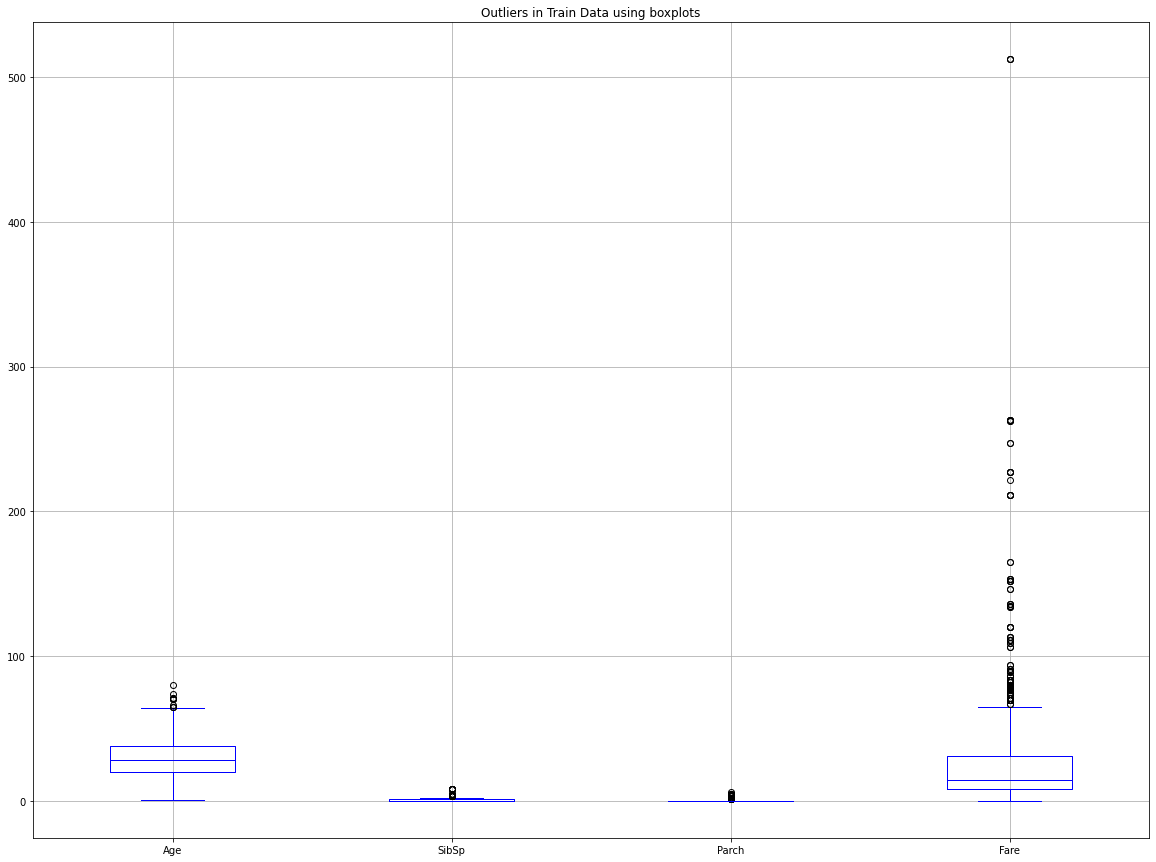

In [17]:
# checking for outliers
cols= train_df[['Age', 'SibSp','Parch','Fare']]
cols.boxplot(figsize=(20,15), color= 'blue')
plt.title('Outliers in Train Data using boxplots')
plt.show()

In [18]:
# Checking for Anomalies
#
Q1= train_df.quantile(0.25)
Q3 =train_df.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

Survived     0.0000
Pclass       2.0000
Sex          0.0000
Age         20.1250
SibSp        0.0000
Parch        0.0000
Fare         7.9104
Embarked     2.0000
Title        1.0000
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

Survived     1.0
Pclass       3.0
Sex          1.0
Age         38.0
SibSp        1.0
Parch        0.0
Fare        31.0
Embarked     3.0
Title        2.0
Name: 0.75, dtype: float64
----------------------------------------


'0.5 quartile'

Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         17.8750
SibSp        1.0000
Parch        0.0000
Fare        23.0896
Embarked     1.0000
Title        1.0000
dtype: float64


In [19]:
# checking for unique values in the dataset
display("Unique values in train dataset:")
display(train_df.nunique())

'Unique values in train dataset:'

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      4
Title         5
dtype: int64

In [20]:
# Identifying the Missing Data
display("Missing values in train dataset")
display(train_df.isnull().sum())

'Missing values in train dataset'

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

In [21]:
# summarize the number of rows with missing values for each column
display("Summary of missing values in percentage for train data")
display(train_df.isnull().sum().sort_values(ascending=False)/train_df.shape[0] * 100)

'Summary of missing values in percentage for train data'

Cabin       77.104377
Age         19.865320
Title        0.000000
Embarked     0.000000
Fare         0.000000
Parch        0.000000
SibSp        0.000000
Sex          0.000000
Pclass       0.000000
Survived     0.000000
dtype: float64

In [22]:
# confirming missing values in the dataset
display("Columns with missing values in Train dataset")
display(train_df.isna().any())

'Columns with missing values in Train dataset'

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked    False
Title       False
dtype: bool

In [23]:
# Dealing with the missing values in the cabin column exctracting information from the cabin column and forming a new column deck
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
train_df["Deck"].isnull().sum()

0

In [24]:
data = [train_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [25]:
# Converting all characters in the message to lower case
# 
train_df.columns = train_df.columns.map(lambda x: x.lower())
train_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'title', 'deck'],
      dtype='object')

## 6. Exploratory Analysis

#### Unimodal Data Visualizations

In [26]:
var = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked', 'title', 'deck']
for v in var:
    print('\nFrequency count for variable %s'%v)
    print(train_df[v].value_counts())


Frequency count for variable survived
0    549
1    342
Name: survived, dtype: int64

Frequency count for variable pclass
3    491
1    216
2    184
Name: pclass, dtype: int64

Frequency count for variable sex
1    577
0    314
Name: sex, dtype: int64

Frequency count for variable age
24    38
22    34
28    33
21    33
30    32
      ..
74     1
66     1
12     1
53     1
80     1
Name: age, Length: 71, dtype: int64

Frequency count for variable sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

Frequency count for variable parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

Frequency count for variable fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

Frequency count for variable embarked
3    644
1    168
2     77
0      2
Name: embarked, dtype: int

In [27]:
# Descriptive summaries for the dataset
print('Variance of values in different columns')
print(train_df.var())
print('Skewness of values in different columns')
print(train_df.skew())
print('Kurtosis of values in different columns')
print(train_df.kurt())
print('Summary')
train_df.describe()

Variance of values in different columns
survived       0.236772
pclass         0.699015
sex            0.228475
age          184.355384
sibsp          1.216043
parch          0.649728
fare        2469.436846
embarked       0.640407
title          1.060979
deck           4.302644
dtype: float64
Skewness of values in different columns
survived    0.478523
pclass     -0.630548
sex        -0.618921
age         0.382172
sibsp       3.695352
parch       2.749117
fare        4.787317
embarked   -1.270634
title       1.377974
deck       -1.636758
dtype: float64
Kurtosis of values in different columns
survived    -1.775005
pclass      -1.280015
sex         -1.620580
age          0.410179
sibsp       17.880420
parch        9.778125
fare        33.398141
embarked    -0.143110
title        1.186361
deck         1.071067
dtype: float64
Summary


,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.627385,0.523008,0.381594,32.204208,2.529742,1.728395,6.936027
std,0.486592,0.836071,0.477990,13.577753,1.102743,0.806057,49.693429,0.800254,1.030039,2.074282
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,2.000000,1.000000,8.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000,1.000000,8.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000,2.000000,8.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,5.000000,8.000000


In [28]:
# counts of the passengers who survived and those who did not
train_df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

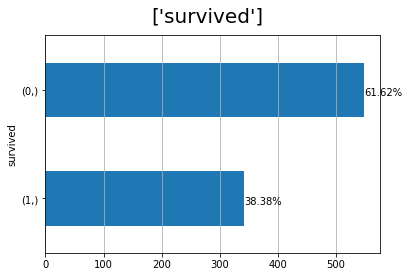

In [29]:
# plotting a bar graph to show the number of passengers who survived and those that did not
y = ['survived']
ax = train_df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

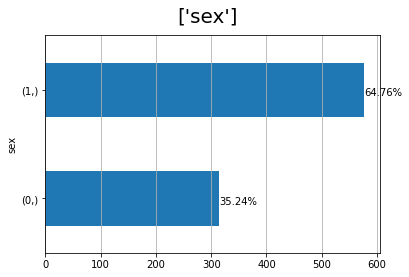

In [30]:
# plotting a bar graph to the number of ales and females
y = ['sex']
ax = train_df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

There were more males than females

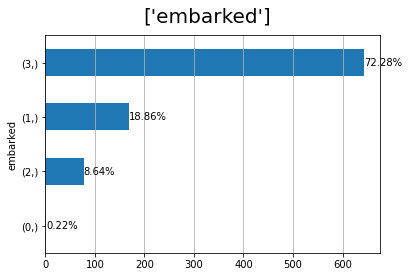

In [31]:
# making a bar plot of the passengers that embarked in the different locations.
y = ['embarked']
ax = train_df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

More passengers  embarked in the location coded 3

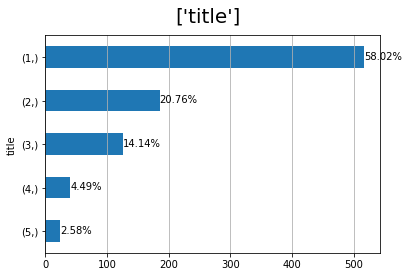

In [32]:
# titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
y = ['title']
ax = train_df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

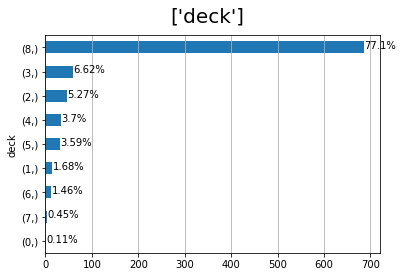

In [33]:
# deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
y = ['deck']
ax = train_df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

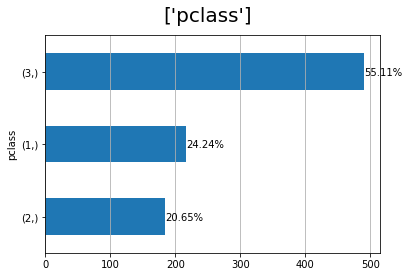

In [34]:
y = ['pclass']
ax = train_df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

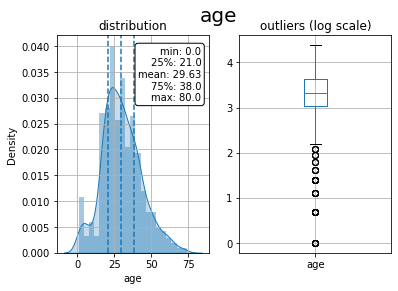

In [35]:
# looking at the distributin of the age of the passengers
x = "age"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False,  sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = train_df[x].fillna(train_df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = train_df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_train_df = pd.DataFrame(train_df[x])
tmp_train_df[x] = np.log(tmp_train_df[x])
tmp_train_df.boxplot(column=x, ax=ax[1], figsize=(10,10))
plt.show()

Most of the passengers were pretty young. The average age of a passenger is approximately 30 years.The distribution is skewed towards the left side and the 75th percentile is 38. Coupled with the outliers in the box plot, the first spike in the left tail is an indication that there was a significant amount of children.

#### Multimodal Data Visualizations

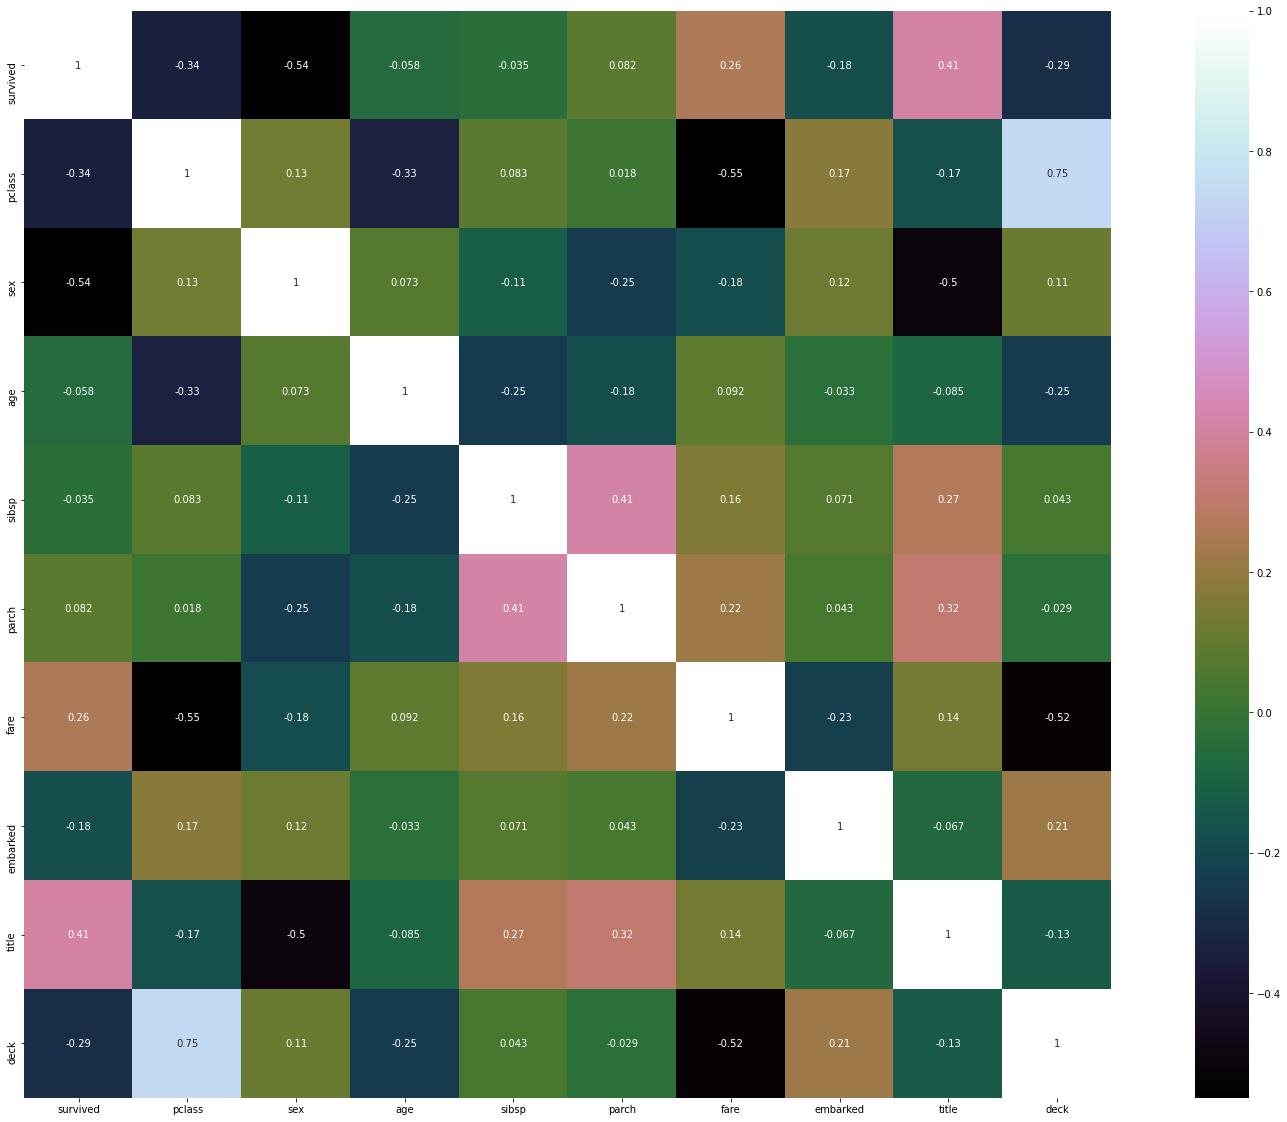

In [36]:
# Getting Correllation matrix
corr_mat=train_df.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [37]:
#get the correlation of each feature with the target variable
corr = pd.DataFrame(train_df.corr()['survived'])
#get the absolute value of the correlation
corr['abs'] = np.abs(corr['survived'])
#sorting the values by their absolute value, in descending order
corr = corr.sort_values(by='abs',ascending=False)
corr
#

,survived,abs
survived,1.000000,1.000000
sex,-0.543351,0.543351
title,0.407753,0.407753
pclass,-0.338481,0.338481
deck,-0.289569,0.289569
fare,0.257307,0.257307
embarked,-0.176509,0.176509
parch,0.081629,0.081629
age,-0.057919,0.057919
sibsp,-0.035322,0.035322


The chance that a passenger would survive or not was highy dependent on te sex of the passenger.

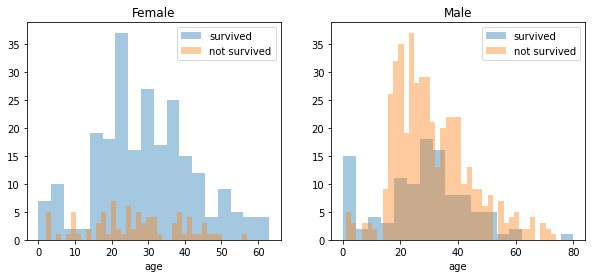

In [38]:
# looking into survival rate on the basis of the sex of the passengers
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['sex']== 0]
men = train_df[train_df['sex']== 1]
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

It is evident from the visual above that the survival rate in females passengers was high. Most specifically the young passengers had a high rate of survival. An indication that the age is predictive in determining whether the passenger will survive or not.

In [39]:
# carrying out an annova test to confirm if really there is a relationship
# between the probability of a passenger surviving  and their age
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
cat, num = "survived", "age"
model = smf.ols(num+' ~ '+cat, data=train_df).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Non-Correlated (p-value: 0.084)


Rejecting the null hypothesis sinc ethe p value is less than 0.05. It is reasonable to cocnlude that the passengers' age contributed to determine their survival. This makes sense as the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited (the “women and children first” code).

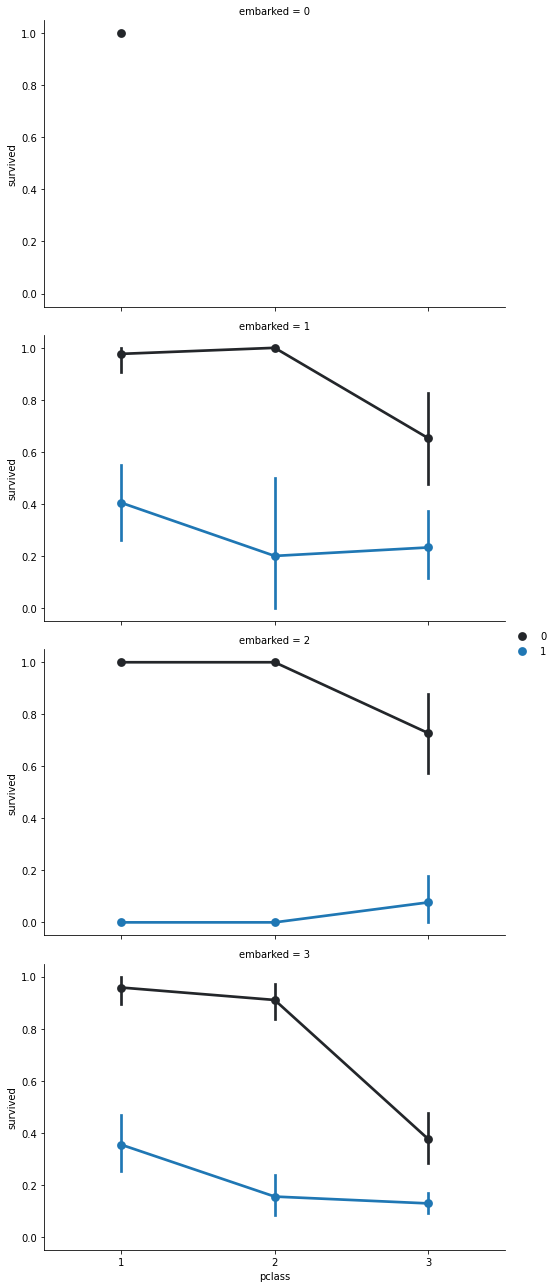

In [40]:
# looking ta the survival of the passenger against the pclass
FacetGrid = sns.FacetGrid(train_df, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

It is evident that aside from the fact that females had a high survivale rate, it is also very important to note that the pclass where the passenger has booked also determined the survival rate as well.

In [41]:
# carry out an anova test to confirm if really there is a relationship
# between the probability of a passenger surviving  and their pclass
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
cat, num = "survived", "pclass"
model = smf.ols(num+' ~ '+cat, data=train_df).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


From the output above, we get to reject the null hypothesis and confidently conclude that there is actually a relationship between the survival of a passenger and the pclass where the passenger was.

### Feature selection

In [42]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
y = train_df['survived'].values
test_features= train_df.drop(['survived'], axis= 1)
X= test_features.values
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 6
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 4
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


From the ouput above the most important features which I will proceed to use in the model *sex,age,sibsp,fare,title* which all have a rank of 1 and marked True in the support array.

### 1: Classification

#### 80-20 train, test sets

In [43]:
# KNN classification model that is not tuned

# initializing the target and predictor variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# rescaling the features into standard units
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# intializing the model to be used
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[97 13]
 [28 41]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.59      0.67        69

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179



For this model, the test set accuracy is about 0.72, which means we made the right prediction for 72% of the survived passengers in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 72% of the time for new survival cases. The level of accuracy could furher be improved through adjusting the relevant parameters since the accuracy is not good enough.

#### 70-30 train, test sets

In [44]:
# KNN classification model that is not tuned

# initializing the target and predictor variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# rescaling the features into standard units
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# intializing the model to be used
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[144  24]
 [ 47  53]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       168
           1       0.69      0.53      0.60       100

    accuracy                           0.74       268
   macro avg       0.72      0.69      0.70       268
weighted avg       0.73      0.74      0.73       268



For this model, the test set accuracy is about 0.74, which means we made the right prediction for 74% of the survived passengers in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 74% of the time for new survival cases. The level of accuracy could further be improved through adjusting the relevant parameters since the accuracy is not good enough.


*Note*: The level of accuracy has slightly increased copared to the 80-20 train-test split.

#### 60-40 train, test sets

In [45]:
# KNN classification model that is not tuned

# initializing the target and predictor variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# rescaling the features into standard units
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# intializing the model to be used
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[188  33]
 [ 70  66]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       221
           1       0.67      0.49      0.56       136

    accuracy                           0.71       357
   macro avg       0.70      0.67      0.67       357
weighted avg       0.71      0.71      0.70       357



For this model, the test set accuracy is about 0.71, which means we made the right prediction for 71% of the survived passengers in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 71% of the time for new survival cases. The level of accuracy could further be improved through adjusting the relevant parameters since the accuracy is not good enough.


*Note*: For this split, it performed the poorest.

## 8. Challenging the solution

To increase the performance of the model, I will work around finding the best prameters that will also increase the accuracy of the model

In [48]:
# Tune scaled KNN for the 80-20 train test sets

# grouping the target and predictior variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
# rescaling the data using the standard scaler
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# instantiating the parameters to be tuned
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
p=[1,2]
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
weights=['uniform', 'distance']
# creating the parameter function
param_grid = dict(n_neighbors=neighbors, p=p, algorithm=algorithm, weights=weights)
# initializing the KNN classifier
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,  cv=10)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832923 using {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.741628 (0.035218) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.741628 (0.035218) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.737402 (0.029056) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.737402 (0.029056) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.797829 (0.032286) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.771166 (0.039119) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.803443 (0.030937) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.773963 (0.043608) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.809018 (0.047055) with: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.785211 (0.044415) with: {'algorithm': 

In [55]:
# Best: 0.832923 using {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
# challenging the model using the best hyperparamters for the 80-20 split
# initializing the target and predictor variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# rescaling the features into standard units
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# intializing the model to be used
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm= 'auto', n_neighbors=  11, p= 1, n_jobs= -1, weights= 'uniform', leaf_size = 10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[96 14]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



Perfoming the model with the tuned hyperparameters for 80- 20 split has increased the accuracy of the model to 81%. Therefore we can say that we made the right prediction for 81% of the survived passengers in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 81% of the time for new survival cases. 

In [56]:
# Tune scaled KNN for the 70-30 train test sets

# grouping the target and predictior variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
# rescaling the data using the standard scaler
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# instantiating the parameters to be tuned
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
p=[1,2]
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
weights=['uniform', 'distance']
# creating the parameter function
param_grid = dict(n_neighbors=neighbors, p=p, algorithm=algorithm, weights=weights)
# initializing the KNN classifier
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,  cv=10)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834716 using {'algorithm': 'auto', 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}
0.730338 (0.047073) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.730338 (0.047073) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.735228 (0.035448) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.735228 (0.035448) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.808858 (0.035512) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.781644 (0.024551) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.808909 (0.035279) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.780056 (0.023100) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.808884 (0.040865) with: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.792934 (0.030942) with: {'algorithm': 

In [65]:
# Best: 0.834716 using {'algorithm': 'auto', 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}

# KNN classification model using the best hyperparameters for the 70-30 split

# initializing the target and predictor variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# rescaling the features into standard units
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# intializing the model to be used
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 19, p= 1, weights= 'uniform', n_jobs=2, leaf_size=25)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[150  18]
 [ 41  59]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       168
           1       0.77      0.59      0.67       100

    accuracy                           0.78       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.78      0.77       268



Perfoming the model with the tuned hyperparameters for 70- 30 split has increased the accuracy of the model to 78% from 74%. Therefore we can say that we made the right prediction for 78% of the survived passengers in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 78% of the time for new survival cases. 

In [66]:
# Tune scaled KNN for the 60-40 train test sets

# grouping the target and predictior variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
# rescaling the data using the standard scaler
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# instantiating the parameters to be tuned
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
p=[1,2]
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
weights=['uniform', 'distance']
# creating the parameter function
param_grid = dict(n_neighbors=neighbors, p=p, algorithm=algorithm, weights=weights)
# initializing the KNN classifier
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,  cv=10)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829665 using {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.737596 (0.055587) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.737596 (0.055587) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.728372 (0.028911) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.728372 (0.028911) with: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.814640 (0.050442) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.786443 (0.056735) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.827848 (0.046754) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.792103 (0.052237) with: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.818414 (0.045699) with: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.797694 (0.064564) with: {'algorithm': '

In [72]:
# Best: 0.829665 using {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
# KNN classification model using the best hyperparameters for the 70-30 split

# initializing the target and predictor variables
y=train_df['survived'].values

test_features= train_df.drop(['survived'], axis=1)
X= test_features.values

# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# rescaling the features into standard units
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# intializing the model to be used
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, p= 1, weights= 'uniform', n_jobs=-1, leaf_size=15)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[190  31]
 [ 57  79]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       221
           1       0.72      0.58      0.64       136

    accuracy                           0.75       357
   macro avg       0.74      0.72      0.73       357
weighted avg       0.75      0.75      0.75       357



Perfoming the model with the tuned hyperparameters for 60- 40 split has increased the accuracy of the model to 75% from 71%. Therefore we can say that we made the right prediction for 75% of the survived passengers in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 75% of the time for new survival cases.


Even after including the best parameters it still perfromed the poorest.

## 9. Follow up questions

> Refining my analytic question or collect new data, all in an iterative process to get at the truth.


### a). Did I have the right data?

### b). Do I need other data to answer our question?

### c). Did I have the right question?